<a href="https://colab.research.google.com/github/StuPidMRE/Deeplearn/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
image_index=7777
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3521 - accuracy: 0.8953
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0833 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0589 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0326 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0194 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0196 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9849


[0.06004621461033821, 0.9848999977111816]

<built-in method argmax of numpy.ndarray object at 0x7f4754409f30>


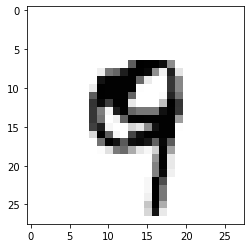

In [13]:
image_index=4444
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax)